In [124]:
# Import public packages and functions
import os
import pandas as pd
import numpy as np
import sys
import json
from pathlib import Path
from scipy import signal

import seaborn as sns
import matplotlib.pyplot as plt
import scikit_posthocs as sp

import warnings
warnings.filterwarnings("ignore")

# inserting the lib folder to the compiler
sys.path.insert(0, './lib')
sys.path.insert(0, './utils/')

import utils_io, utils_coherence, utils_plotting_coherence

from lib_data import DATA_IO

In [2]:
PATH_CURR = os.path.abspath(os.curdir)    # current code
PATH      = (str(Path(PATH_CURR).parent)) # data repository: upper directory where datasets situated
fs        = 2048

# 1. Measure Baseline Coherence Between LFP and ECOG Channels

In [4]:
#baseline_coherence_LFP_ECOG = utils_coherence.extract_baseline_coherence_between_ECOG_LFP_channels()
#baseline_coherence_LFP_ECOG.to_pickle(DATA_IO.path_events + "coherence/ECOG_LFP_BASELINE_COHERENCE.pkl")
baseline_coherence_LFP_ECOG = pd.read_pickle(DATA_IO.path_events + "coherence/ECOG_LFP_BASELINE_COHERENCE.pkl")

# 2. Measure Events Coherence Between LFP and ECOG Channels

## 2.1 Load Events

In [7]:
# load ECoG events
EVENTS_ECOG            = utils_io.load_ECoG_events(event_category="voluntary", fs=2048)
EVENTS_ECOG_LID        = EVENTS_ECOG['controlateral']['LID']
EVENTS_ECOG_noLID      = EVENTS_ECOG['controlateral']['noLID']
# load LFP events
EVENTS_LFP             = utils_io.load_LFP_events(event_category="tapping", stn_areas=["motor"], fs=2048)
EVENTS_LFP_MOTOR_LID   = EVENTS_LFP['motor']['controlateral']['LID']
EVENTS_LFP_MOTOR_noLID = EVENTS_LFP['motor']['controlateral']['noLID']

## 2.2 Coherence Between Ipsilateral MOTOR-STN and ECOG Channels

In [9]:
coherence_motor_LID    = utils_coherence.measure_ECOG_LFP_coherence(dataset_LFP=EVENTS_LFP_MOTOR_LID[EVENTS_LFP_MOTOR_LID.duration>=0.25], 
                                                                    dataset_ECOG=EVENTS_ECOG_LID[EVENTS_ECOG_LID.duration>=0.25], 
                                                                    dataset_baseline_LFP_ECOG_coherence=baseline_coherence_LFP_ECOG, mode="ipsilateral")

ECOG-LFP Channel Coherence Measurement Started...
---> Patient: 008
     LFP: left hemisphere - 04-01 | ECOG: left hemisphere - 02-01
     LFP: left hemisphere - 05-02 | ECOG: left hemisphere - 02-01
     LFP: left hemisphere - 06-03 | ECOG: left hemisphere - 02-01
     LFP: left hemisphere - 07-04 | ECOG: left hemisphere - 02-01
     LFP: left hemisphere - 08-05 | ECOG: left hemisphere - 02-01
     LFP: left hemisphere - 09-06 | ECOG: left hemisphere - 02-01
     LFP: left hemisphere - 10-07 | ECOG: left hemisphere - 02-01
     LFP: left hemisphere - 11-08 | ECOG: left hemisphere - 02-01
     LFP: left hemisphere - 11-09 | ECOG: left hemisphere - 02-01
     LFP: left hemisphere - 13-10 | ECOG: left hemisphere - 02-01
     LFP: left hemisphere - 14-11 | ECOG: left hemisphere - 02-01
     LFP: left hemisphere - 04-01 | ECOG: left hemisphere - 03-02
     LFP: left hemisphere - 05-02 | ECOG: left hemisphere - 03-02
     LFP: left hemisphere - 06-03 | ECOG: left hemisphere - 03-02
     LFP

In [10]:
coherence_motor_noLID  = utils_coherence.measure_ECOG_LFP_coherence(dataset_LFP=EVENTS_LFP_MOTOR_noLID[EVENTS_LFP_MOTOR_noLID.duration>=0.25],
                                                                    dataset_ECOG=EVENTS_ECOG_noLID[EVENTS_ECOG_noLID.duration>=0.25], 
                                                                    dataset_baseline_LFP_ECOG_coherence=baseline_coherence_LFP_ECOG, mode="ipsilateral")

ECOG-LFP Channel Coherence Measurement Started...
---> Patient: 008
     LFP: left hemisphere - 04-01 | ECOG: left hemisphere - 02-01
     LFP: left hemisphere - 05-02 | ECOG: left hemisphere - 02-01
     LFP: left hemisphere - 06-03 | ECOG: left hemisphere - 02-01
     LFP: left hemisphere - 07-04 | ECOG: left hemisphere - 02-01
     LFP: left hemisphere - 08-05 | ECOG: left hemisphere - 02-01
     LFP: left hemisphere - 09-06 | ECOG: left hemisphere - 02-01
     LFP: left hemisphere - 10-07 | ECOG: left hemisphere - 02-01
     LFP: left hemisphere - 11-08 | ECOG: left hemisphere - 02-01
     LFP: left hemisphere - 11-09 | ECOG: left hemisphere - 02-01
     LFP: left hemisphere - 13-10 | ECOG: left hemisphere - 02-01
     LFP: left hemisphere - 14-11 | ECOG: left hemisphere - 02-01
     LFP: left hemisphere - 04-01 | ECOG: left hemisphere - 03-02
     LFP: left hemisphere - 05-02 | ECOG: left hemisphere - 03-02
     LFP: left hemisphere - 06-03 | ECOG: left hemisphere - 03-02
     LFP

# 3.Plotting

## 3.1 LID vs no-LID

<Figure size 640x480 with 0 Axes>

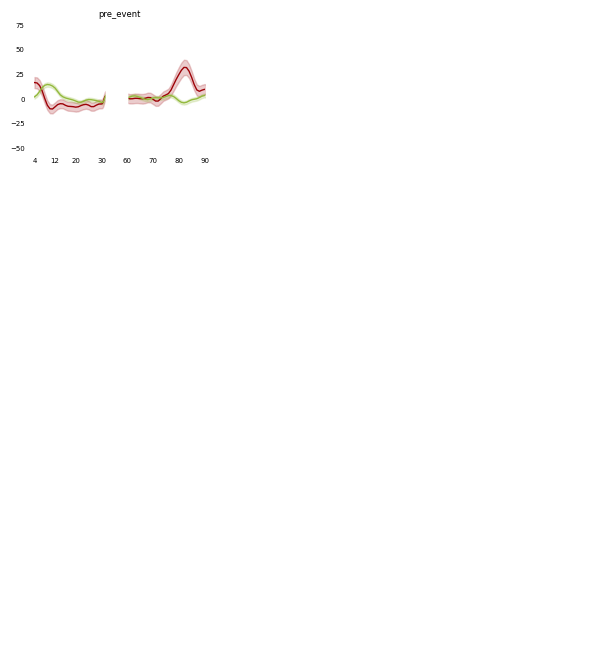

In [141]:
utils_plotting_coherence.plot_LID_vs_noLID_coherence(coherence_motor_LID, coherence_motor_noLID, segment="pre_event", error_type="se", 
                                                     figure_name=DATA_IO.path_figure + "LFP-ECOG Coherence/LID_vs_noLID_pre_event")

<Figure size 640x480 with 0 Axes>

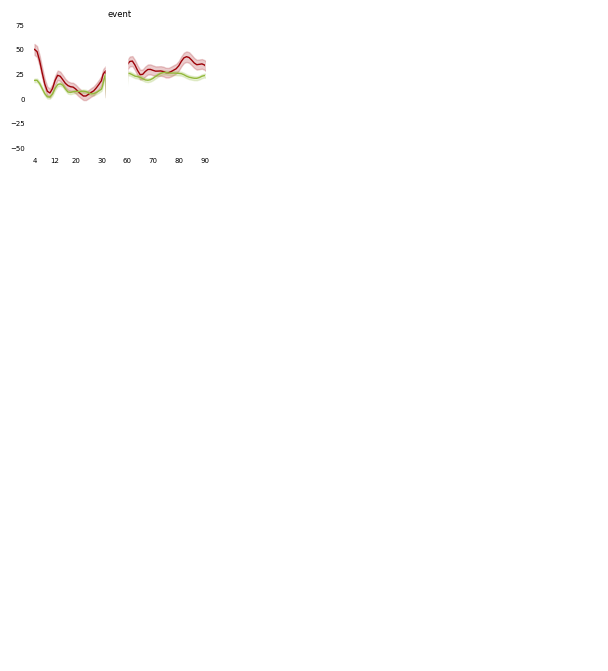

In [142]:
utils_plotting_coherence.plot_LID_vs_noLID_coherence(coherence_motor_LID, coherence_motor_noLID, segment="event", error_type="se", 
                                                     figure_name=DATA_IO.path_figure + "LFP-ECOG Coherence/LID_vs_noLID_event")

<Figure size 640x480 with 0 Axes>

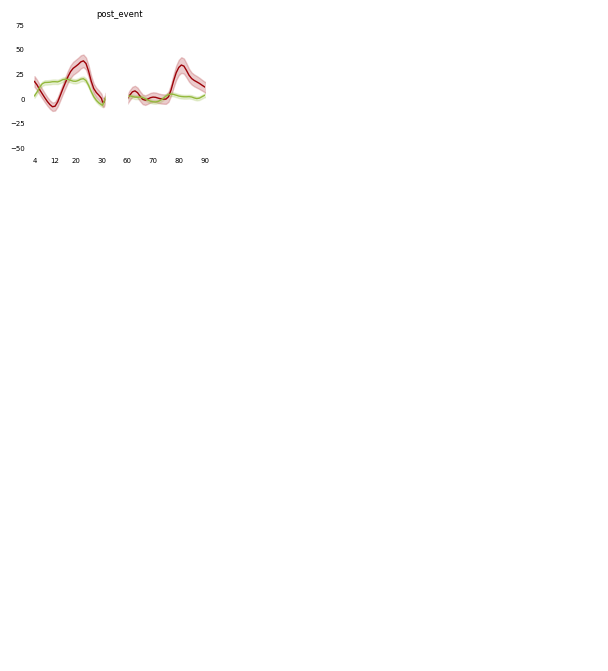

In [145]:
utils_plotting_coherence.plot_LID_vs_noLID_coherence(coherence_motor_LID, coherence_motor_noLID, segment="post_event", error_type="se", 
                                                     figure_name=DATA_IO.path_figure + "LFP-ECOG Coherence/LID_vs_noLID_post_event")

## 3.2 Dyskinesia Severity

<Figure size 640x480 with 0 Axes>

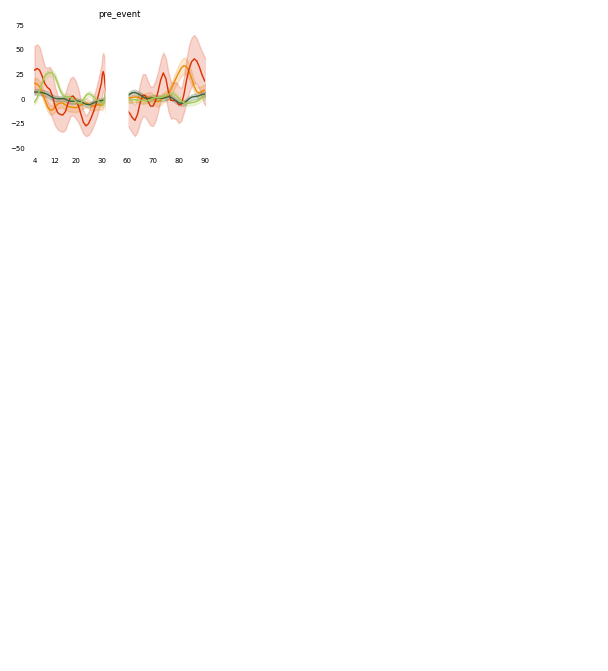

In [148]:
utils_plotting_coherence.plot_dyskinesia_severity_coherence(coherence_motor_LID, coherence_motor_noLID, segment="pre_event", error_type="se", 
                                                            figure_name=DATA_IO.path_figure + "LFP-ECOG Coherence/dyskinesia_severity_pre_event")

<Figure size 640x480 with 0 Axes>

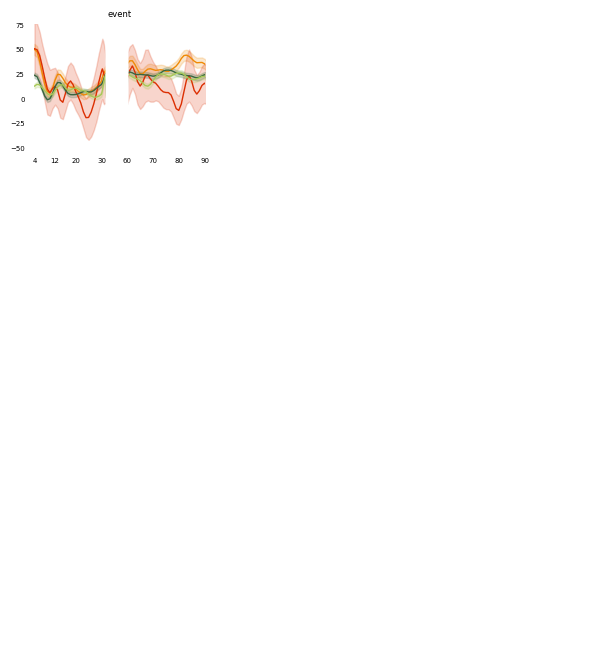

In [149]:
utils_plotting_coherence.plot_dyskinesia_severity_coherence(coherence_motor_LID, coherence_motor_noLID, segment="event", error_type="se", 
                                                            figure_name=DATA_IO.path_figure + "LFP-ECOG Coherence/dyskinesia_severity_event")

<Figure size 640x480 with 0 Axes>

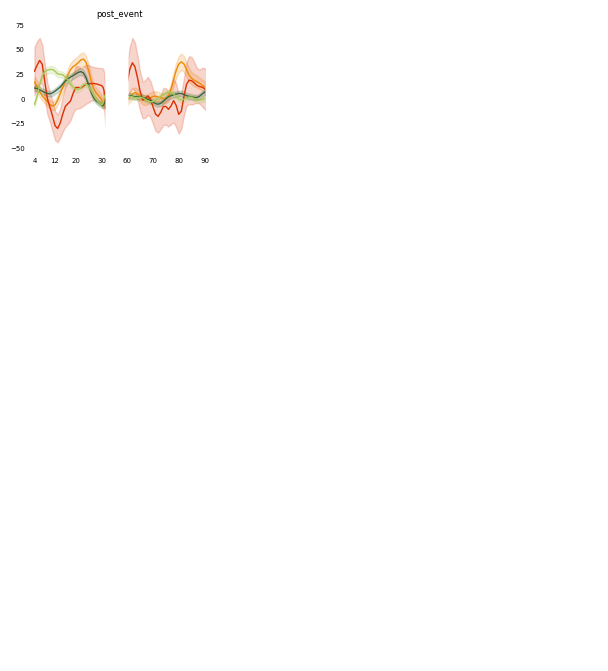

In [151]:
utils_plotting_coherence.plot_dyskinesia_severity_coherence(coherence_motor_LID, coherence_motor_noLID, segment="post_event", error_type="se", 
                                                            figure_name=DATA_IO.path_figure + "LFP-ECOG Coherence/dyskinesia_severity_post_event")

In [155]:
coherence_motor_noLID.patient.unique()

array(['008', '013', '014', '017', '020', '021'], dtype=object)